In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Read in CSV
data = pd.read_csv('')

In [5]:
# Return count of cluster predictions
pred_counts = data.groupby(['preds']).agg({
    'preds':'count'}).rename(columns={'preds':'Count'}).reset_index()
pred_counts

,preds,Count
0,0,27264
1,1,84791
2,2,66810
3,3,66749
4,4,52725


In [6]:
# Find distribution of flags per cluster
cols = list(data)
cols.remove('preds')

group_data = data.groupby(['preds'])[cols].mean()
group_data['Count'] = pred_counts['Count']
group_data = group_data.transpose()
group_data

preds,0,1,2,3,4
Unnamed: 0,1.497374e+05,1.488618e+05,1.491560e+05,1.490682e+05,1.495131e+05
has_southwest_airlines,4.299076e-01,4.316614e-01,4.368807e-01,4.314671e-01,4.361498e-01
has_american_airlines,3.009463e-01,3.027680e-01,2.980242e-01,3.170085e-01,2.978094e-01
has_delta_airlines,3.621992e-01,3.524902e-01,3.459063e-01,3.603050e-01,3.561878e-01
has_united_airlines,3.379548e-01,3.421943e-01,3.304296e-01,3.905227e-01,3.373352e-01
aerobics,6.433759e-01,7.042021e-02,2.035623e-01,2.314192e-01,4.591370e-01
art_craft,9.662192e-01,1.386940e-01,6.082622e-01,7.421085e-01,9.359886e-01
auto_motorcycle_racing,3.839862e-01,3.455555e-03,4.261338e-02,3.934141e-02,2.317876e-01
auto_parts_repair_accesories_work,2.104607e-01,5.354342e-03,7.214489e-02,1.371107e-01,2.231769e-01
auto_work,7.095070e-01,3.264497e-02,3.155815e-01,3.729644e-01,7.110669e-01


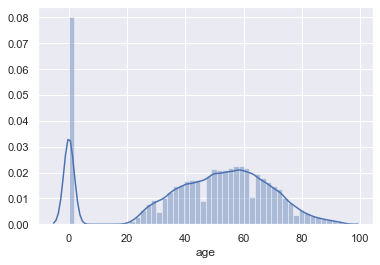

In [11]:
# Plot age distribution
sns.distplot(data['age'])

In [10]:
zeros = (data['age'] == 0).sum()
total = data['age'].count()
print('number of zero ages: ' + str(zeros))
print('percent of population: ' + str((zeros/total)*100))

number of zero ages: 44928
percent of population: 15.059378760403433


In [12]:
sw_zeros = (data['has_southwest_airlines'] == 0).sum()
sw_ones = (data['has_southwest_airlines'] == 1).sum()
sw = {'0': sw_zeros, '1': sw_ones}

aa_zeros = (data['has_american_airlines'] == 0).sum()
aa_ones = (data['has_american_airlines'] == 1).sum()
aa = {'0': aa_zeros, '1': aa_ones}

da_zeros = (data['has_delta_airlines'] == 0).sum()
da_ones = (data['has_delta_airlines'] == 1).sum()
da = {'0': da_zeros, '1': da_ones}

ua_zeros = (data['has_united_airlines'] == 0).sum()
ua_ones = (data['has_united_airlines'] == 1).sum()
ua = {'0': ua_zeros, '1': ua_ones}


Text(0.5, 1.0, 'Has United CC')

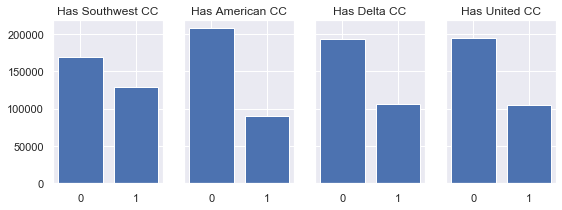

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(9, 3), sharey=True)
axs[0].bar(sw.keys(),sw.values())
axs[0].set_title('Has Southwest CC')
axs[1].bar(aa.keys(),aa.values())
axs[1].set_title('Has American CC')
axs[2].bar(da.keys(),da.values())
axs[2].set_title('Has Delta CC')
axs[3].bar(ua.keys(),ua.values())
axs[3].set_title('Has United CC')

In [14]:

age_cc_data = data.groupby(['age']).agg({
    'has_southwest_airlines':'mean','has_american_airlines':'mean','has_delta_airlines':'mean',
    'has_united_airlines':'mean','age':'count'})
age_cc_data

,has_southwest_airlines,has_american_airlines,has_delta_airlines,has_united_airlines,age
age,,,,,
0,0.427618,0.306847,0.351229,0.353944,44928
19,0.200000,0.600000,0.200000,0.600000,5
20,0.517857,0.267857,0.303571,0.303571,56
21,0.381579,0.296053,0.315789,0.342105,152
22,0.382643,0.299803,0.372781,0.268245,507
23,0.431818,0.293831,0.321429,0.305195,616
24,0.421384,0.305031,0.350105,0.333333,954
25,0.372408,0.327751,0.377193,0.338118,1254
26,0.419672,0.306557,0.361749,0.321858,1830


In [ ]:
cc_data = data[['has_southwest_airlines','has_american_airlines','has_delta_airlines',
    'has_united_airlines','preds']]
cc_data